### Classification

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [8,8]
np.random.seed(42)

**Import Data**

"100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits"

link:https://archive.ics.uci.edu/ml/datasets/Fertility

Attribute Information:

    - Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)

    - Age at the time of analysis. 18-36 (0, 1)

    - Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)

    - Accident or serious trauma 1) yes, 2) no. (0, 1)

    - Surgical intervention 1) yes, 2) no. (0, 1)

    - High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)

    - Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)

    - Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)

    - Number of hours spent sitting per day ene-16 (0, 1)

    - Output: Diagnosis normal (N), altered (O)

In [3]:
df=pd.read_csv('data/fertility.csv',header=None) 

In [4]:
df=df.rename(columns={
    0:'season',
    1:'age',
    2:'childish_diseases',
    3:'accident',
    4:'surgical_intervention',
    5:'high_fevers',
    6:'frequency_alcohol_consumption',
    7:'smoking',
    8:'hours_spent_sitting',
    9:'output'
})
df.head()

,season,age,childish_diseases,accident,surgical_intervention,high_fevers,frequency_alcohol_consumption,smoking,hours_spent_sitting,output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


classes distribution: Imbalanced Data

In [5]:
targets=df['output'].replace('N',1).replace('O',0)
y=df['output'].replace('N',1).replace('O',0)#.replace('N',1).replace('O',0)
y.value_counts() #Imbalanced Data

1    88
0    12
Name: output, dtype: int64

In [6]:
df_new=df.drop('output',axis=1)
df_new.head()

,season,age,childish_diseases,accident,surgical_intervention,high_fevers,frequency_alcohol_consumption,smoking,hours_spent_sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50


### Modeling

**Scaling data**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_new)
df_scaled=pd.DataFrame(scaler.transform(df_new))

df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-0.316753,0.173970,-2.586949,1.128152,0.980196,-0.32881,-0.192006,0.434959,2.551481
1,-0.316753,2.245043,0.386556,-0.886405,0.980196,-0.32881,-0.192006,1.677698,-0.521943
2,-0.316753,-1.400045,0.386556,-0.886405,-1.020204,-0.32881,1.008032,-0.807781,0.502532
3,-0.316753,0.671028,-2.586949,1.128152,0.980196,-0.32881,1.008032,-0.807781,-0.144505
4,-0.316753,0.008284,0.386556,1.128152,-1.020204,-0.32881,-0.192006,-0.807781,0.502532


**Training**

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score

#training a BernoulliNB() with different split data values
def train_validation_plot(df,y,mode,X_test,y_test,algorithm):
    if mode=='split': #use train_test_split fucntion
        X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
    elif mode=='false': #use the extern values for train and test
        X_train=df
        y_train=y
    

    if algorithm=='RandomForestC':
        clf = RandomForestClassifier(n_estimators=10,random_state=0)
    else:
        clf=BernoulliNB()
        
    #class distributions of y_test
    num_positives=y_test.value_counts()[1]
    num_negatives=y_test.value_counts()[0]
    print('\nTest data: Examples positives: {} and Examples negatives: {}'.format(num_positives,num_negatives))
    
    clf.fit(X_train,y_train)    
    pred=clf.predict(X_test)
    #scores
    print('f1_score: ', f1_score(y_test,pred))
    print('accuracy_score: ', accuracy_score(y_test,pred))
    print('recall_score: ', recall_score(y_test,pred))

    #Comparing the true and predicted response values
    comp_results=pd.DataFrame(y_test)
    comp_results['predictions']=pred
    comp_results=comp_results.sort_values(by='output',ascending=False)

    #Calculating Confusion_Matrix and F1_score
    TP=(comp_results.query('output==predictions and output==1')).shape[0]
    TN=(comp_results.query('output==predictions and output==0')).shape[0]
    FP=(comp_results.query('output!=predictions and output==0')).shape[0]
    FN=(comp_results.query('output!=predictions and output==1')).shape[0]
    ACC=(TP+TN)/y_test.shape[0]
    SEN=TP/num_positives
    ESP=TN/num_negatives
    PREC=TP/(TP+FP)
    F1_SCORE= 2 * (PREC * SEN) / (PREC + SEN)
    print('F1 SCORE: ',F1_SCORE) #we calculated the same value than sklearn
    #confusion matrix
    CONFUSION_MATRIX=pd.DataFrame([TP,FN], columns=['POSITIVE CLASS'])
    CONFUSION_MATRIX['NEGATIVE CLASS']=[FP,TN]
    new_index=['Prediction POS','Prediction NEG']
    CONFUSION_MATRIX=CONFUSION_MATRIX.set_index([new_index])
    print('\nConfusion Matrix:')
    print(CONFUSION_MATRIX)

    
    
    #PLOT ROC CURVE
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot

    fpr, tpr, thresholds = roc_curve(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [9]:
df=df_scaled #We will working with the scaled data

Scores from scaled data using BernoulliNB Classifier: 


Test data: Examples positives: 28 and Examples negatives: 2
f1_score:  0.9655172413793104
accuracy_score:  0.9333333333333333
recall_score:  1.0
F1 SCORE:  0.9655172413793104

Confusion Matrix:
                POSITIVE CLASS  NEGATIVE CLASS
Prediction POS              28               2
Prediction NEG               0               0


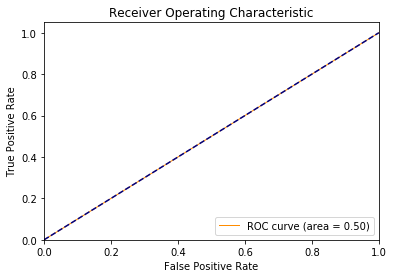

In [10]:
print('Scores from scaled data using BernoulliNB Classifier: \n')
train_validation_plot(df,y,'split',_,_,'BernoulliNB')

We can see through the ROC curve that this classificator have not acceptable results, although f1_score, accuracy_score, recall_score and F1_SCORE have it. This classificator is predicting all values as Class 1.
Now, we can apply some techniques for balancing classes and try to have better results, some techniques were presented of [Tara Boyle](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18).

Now, using the algorithm RandomForestClassifier:

Scores from scaled data using RandomForestClassifier: 


Test data: Examples positives: 28 and Examples negatives: 2
f1_score:  1.0
accuracy_score:  1.0
recall_score:  1.0
F1 SCORE:  1.0

Confusion Matrix:
                POSITIVE CLASS  NEGATIVE CLASS
Prediction POS              28               0
Prediction NEG               0               2


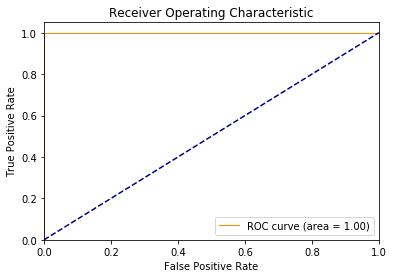

In [11]:
print('Scores from scaled data using RandomForestClassifier: \n')
train_validation_plot(df,y,'split',_,_,'RandomForestC')

We can obtain better results with only use another algorithm, but we can try another techniques.

**resample**

Adding more copies of the minority class.

In [12]:

from sklearn.utils import resample

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
# concatenate our training data back together
X = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

# separate minority and majority classes
N = X[X.output==1]
O = X[X.output==0]

# upsample minority
O_upsampled = resample(O, replace=True, # sample with replacement
                          n_samples=len(N), # match number in majority class
                          random_state=0) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([N, O_upsampled])
print('Balanced classes to train')
# check new class counts
upsampled.output.value_counts()

Balanced classes to train


1    60
0    60
Name: output, dtype: int64

Scores from scaled data (adding more copies of the minority class) with RandomForestClassifier : 


Test data: Examples positives: 28 and Examples negatives: 2
f1_score:  0.9433962264150945
accuracy_score:  0.9
recall_score:  0.8928571428571429
F1 SCORE:  0.9433962264150945

Confusion Matrix:
                POSITIVE CLASS  NEGATIVE CLASS
Prediction POS              25               0
Prediction NEG               3               2


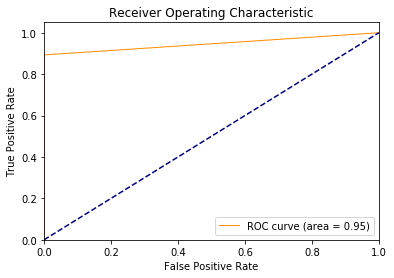

In [13]:
y_aux=upsampled.output
df_aux=upsampled.drop('output',axis=1)
print('Scores from scaled data (adding more copies of the minority class) with RandomForestClassifier : \n')
train_validation_plot(df_aux,y_aux,'false',X_test,y_test,'RandomForestC')

**Undersample majority class**

Removing some observations of the majority class

In [14]:
N_downsampled = resample(N, replace = False, # sample without replacement
                            n_samples = len(O), # match minority n
                            random_state = 0) # reproducible results
# combine minority and downsampled majority
downsampled = pd.concat([N_downsampled, O])
print('Balanced classes to train')
# checking counts
downsampled.output.value_counts()

Balanced classes to train


1    10
0    10
Name: output, dtype: int64

Scores from scaled data (removing some observations of the majority class) with RandomForestClassifier 


Test data: Examples positives: 28 and Examples negatives: 2
f1_score:  0.6
accuracy_score:  0.4666666666666667
recall_score:  0.42857142857142855
F1 SCORE:  0.6

Confusion Matrix:
                POSITIVE CLASS  NEGATIVE CLASS
Prediction POS              12               0
Prediction NEG              16               2


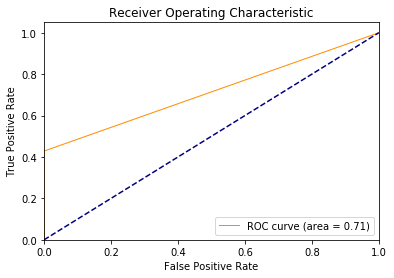

In [15]:
y_aux2=downsampled.output
df_aux2=downsampled.drop('output',axis=1)
print('Scores from scaled data (removing some observations of the majority class) with RandomForestClassifier \n')
train_validation_plot(df_aux2,y_aux2,'false',X_test,y_test,'RandomForestC')

**SMOTE**

Using TensorFlow backend.


balanced clases to train
1    60
0    60
Name: 0, dtype: int64

Test data: Examples positives: 28 and Examples negatives: 2
f1_score:  0.8846153846153847
accuracy_score:  0.8
recall_score:  0.8214285714285714
F1 SCORE:  0.8846153846153847

Confusion Matrix:
                POSITIVE CLASS  NEGATIVE CLASS
Prediction POS              23               1
Prediction NEG               5               1


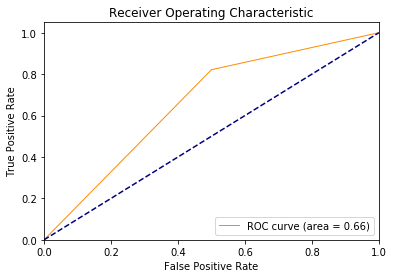

In [16]:
#A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.
#Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

from imblearn.over_sampling import SMOTE
#df=pd.read_csv('data/fertility.csv',header=None)
#df=df.rename(columns={9:'output'})

# Separate input features and target
#y = df['output'].replace('N',1).replace('O',0)
#X = df.drop('output', axis=1)
X_aux=df_scaled
y_aux=targets

# setting up testing and training sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_aux, y_aux, test_size=0.3, random_state=27)

sm = SMOTE(random_state=0, ratio=1.0)
X_train2, y_train2 = sm.fit_sample(X_train2, y_train2)

print('balanced clases to train')
y_train2=pd.DataFrame(y_train2)
print(y_train2[0].value_counts())#checking counts

train_validation_plot(X_train2,y_train2,'false',X_test2,y_test2,'RandomForestC')